# Data Cleaning - Part 1

In [1]:
!pip install numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

C:\Users\Mustermann\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from skimpy import clean_columns

In [3]:
pd.set_option("display.float_format", lambda x : '%.2f' %x)  # 2 decimal place

In [4]:
df0 = pd.read_json("as24_cars.json")
df = df0.copy()

In [5]:
df.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [6]:
df.shape

(29480, 58)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

# Rename the incorrect headers (column names)

In [8]:
df = clean_columns(df)
df.head(3).T

50 column names have been cleaned

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-"
body_type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]"
doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]"
country_version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [9]:
df.isnull().sum() / len(df) * 100

make_model                 2.88
short_description          2.88
make                       2.88
model                      2.88
location                   2.88
price                      2.88
body_type                  2.88
type                       2.88
doors                      4.10
country_version           42.71
offer_number              21.64
warranty                  46.46
mileage                    2.89
first_registration         2.89
gearbox                    3.72
fuel_type                  8.95
colour                     8.73
paint                     50.83
desc                       4.86
seller                     2.88
seats                     13.48
power                      4.82
engine_size                7.64
gears                     35.71
co_emissions              36.93
manufacturer_colour       26.10
drivetrain                42.70
cylinders                 36.05
fuel_consumption          20.68
comfort_&_convenience     13.73
entertainment_&_media     19.80
safety_&

# Drop the columns having missing value more than 80%

In [10]:
def df_nans(df, limit):
    missing = df.isnull().sum()/len(df)*100
    return missing.loc[lambda x : x>=limit]

In [11]:
df_nans(df, 80)

last_service              93.21
other_fuel_types          92.15
power_consumption         98.25
fuel_consumption_wltp     99.66
co_emissions_wltp         99.61
available_from            98.67
taxi_or_rental_car        98.57
availability              98.98
last_timing_belt_change   98.06
electric_range_wltp       99.95
power_consumption_wltp    99.95
battery_ownership         99.98
dtype: float64

In [12]:
df_nans(df, 80).index

Index(['last_service', 'other_fuel_types', 'power_consumption',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership'],
      dtype='object')

In [13]:
drop_columns = df_nans(df, 80).index

In [14]:
df.drop(drop_columns, axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   short_description        28630 non-null  object 
 2   make                     28630 non-null  object 
 3   model                    28630 non-null  object 
 4   location                 28630 non-null  object 
 5   price                    28630 non-null  object 
 6   body_type                28630 non-null  object 
 7   type                     28630 non-null  object 
 8   doors                    28271 non-null  object 
 9   country_version          16889 non-null  object 
 10  offer_number             23100 non-null  object 
 11  warranty                 15784 non-null  object 
 12  mileage                  28629 non-null  object 
 13  first_registration       28628 non-null  object 
 14  gearbox               

In [16]:
df.shape

(29480, 46)

# Examination of duplicated values

In [17]:
df.astype(str).duplicated(keep=False).sum()

4384

In [18]:
df[df.astype(str).duplicated(keep=False)]

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
579,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",...,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
580,Mercedes-Benz SLK 200,Kompressor Aut. Cabrio Final Edition,\nMercedes-Benz\n,"[\n, SLK 200 ,\n]","Marienborner Str. 49, 55128 Mainz, DE","€ 15,990.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",...,NaN,Yes,Euro 4,4 (Green),Black,Full leather,NaN,"[[39,000 km, 05/2003], 1]",NaN,NaN
610,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,...,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
613,Mercedes-Benz G 500,Cabrio LORINSER UMBAU/AHK/ELEKTR. SITZE,\nMercedes-Benz\n,"[\n, G 500 ,\n]","Alte Bundesstr. 45, 71332 Waiblingen, DE","€ 209,000.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 3, \n]",NaN,...,Yes,Yes,Euro 4,4 (Green),Black,Full leather,1999.00,"[[172,000 km, 02/1999], 2]",G,Calculated on basis of measured CO₂-emissions ...
839,Mercedes-Benz CLA 45 AMG,4Matic*KAMERA*NAVI*LED*DESIGNO*SHZ*,\nMercedes-Benz\n,"[\n, CLA 45 AMG ,\n]","Aidlinger Straße 16 - 18, 71069 Sindelfingen-...","€ 33,890.-","[\n, Coupe, \n]","[\n, Used, \n]","[\n, 4, \n]","[\n, Germany, \n]",...,Yes,Yes,Euro 6,4 (Green),Black,alcantara,NaN,"[[76,900 km, 08/2016], 2]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29441,Volvo V40,D3 150ch R-Design Geartronic,\nVolvo\n,"[\n, V40 ,\n]","19 rue des Alliés, 57050 Metz, FR","€ 18,999.-","[\n, Sedan, \n]","[\n, Used, \n]","[\n, 5, \n]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df.astype(str).duplicated(['make_model', 'short_description', 'location'], 
                             keep=False)]['make_model'].value_counts(dropna=True)

Volvo C70              690
Volvo V40              678
Volvo XC60             350
Volvo V60              308
Volvo C30              228
                      ... 
Mercedes-Benz V 250      2
Toyota Camry             2
Toyota Avensis           2
Mercedes-Benz S 500      2
Volvo 945                2
Name: make_model, Length: 198, dtype: int64

In [20]:
df[df.astype(str)["make_model"] == "Volvo C70"].head(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,...,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,energy_efficiency_class,co_efficiency
26470,Volvo C70,T5 Summum,\nVolvo\n,"[\n, C70 ,\n]","RIO ULLA 15, 28017 MADRID, ES","€ 11,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Spain, \n]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26471,Volvo C70,2.4i Momentum,\nVolvo\n,"[\n, C70 ,\n]","Auf dem Sand 28, 40721 Hilden, DE","€ 11,880.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",...,Yes,NaN,Euro 4,4 (Green),Beige,Part leather,NaN,"[[155,923 km, 08/2006], 2]",F,Calculated on basis of measured CO₂-emissions ...
26472,Volvo C70,2.5T 220PS Cabriolet T5 Summum 1.Hand Xenon,\nVolvo\n,"[\n, C70 ,\n]","Lichterfelder Allee 14, 14513 Teltow, DE","€ 20,999.-","[\n, Convertible, \n]","[\n, Used, \n]","[\n, 2, \n]","[\n, Germany, \n]",...,Yes,Yes,Euro 4,4 (Green),Grey,Full leather,NaN,"[[69,747 km, 05/2007], 1]",NaN,NaN


In [21]:
df[df['make_model'] == 'Volvo C70'].astype(str).duplicated(keep=False).value_counts(dropna=False)

True     690
False      2
dtype: int64

# The Examination of Columns

In [22]:
# let's create a function to see the first look of a column

In [23]:
def first_looking(col):
    print("column name:", col)
    print("---------------------------------")
    print("per_of_nulls", "%", round(df[col].isnull().sum()/len(df) * 100, 2))
    print("num_of_nulls", df[col].isnull().sum())
    print("num_of_uniques", df[col].astype(str).nunique())
    print("---------------------------------")
    print(df[col].value_counts(dropna=False))

# Price column

In [24]:
first_looking("price")

column name: price
---------------------------------
per_of_nulls % 2.88
num_of_nulls 850
num_of_uniques 5022
---------------------------------
NaN           850
€ 14,990.-    222
€ 12,990.-    219
€ 16,990.-    186
€ 19,990.-    166
             ... 
€ 19,112.-      1
€ 30,465.-      1
€ 18,461.-      1
€ 22,649.-      1
€ 4,440.-       1
Name: price, Length: 5022, dtype: int64


In [25]:
df.price.astype(str).str.extract('(\d+.\d+)')

,0
0,"16,950"
1,"80,900"
2,"69,900"
3,"46,990"
4,"16,800"
...,...
29475,"5,499"
29476,"7,300"
29477,"29,900"
29478,"4,440"


In [26]:
df.price = df.price.astype(str).str.extract('(\d+.\d+)')

In [27]:
df.price.str.replace(',', '').astype(float)

0       16950.00
1       80900.00
2       69900.00
3       46990.00
4       16800.00
          ...   
29475    5499.00
29476    7300.00
29477   29900.00
29478    4440.00
29479        NaN
Name: price, Length: 29480, dtype: float64

In [28]:
df.price = df.price.str.replace(',', '').astype(float)

In [29]:
df['price']

0       16950.00
1       80900.00
2       69900.00
3       46990.00
4       16800.00
          ...   
29475    5499.00
29476    7300.00
29477   29900.00
29478    4440.00
29479        NaN
Name: price, Length: 29480, dtype: float64

In [30]:
df.shape

(29480, 46)

In [31]:
df.dropna(how='all', inplace=True)

In [32]:
df.shape

(28630, 46)

In [33]:
df.price.describe()

count    28630.00
mean     23470.66
std      23953.50
min        490.00
25%      11990.00
50%      17979.00
75%      27990.00
max     999999.00
Name: price, dtype: float64

In [34]:
plt.rcParams["figure.figsize"] = (10, 6)

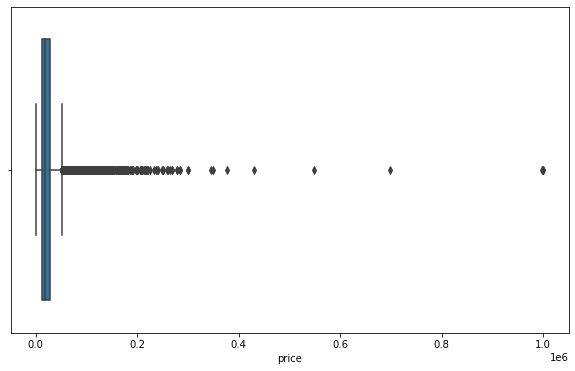

In [35]:
sns.boxplot(x=df.price);

C:\Users\Mustermann\AppData\Local\Temp\ipykernel_16548\1279397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


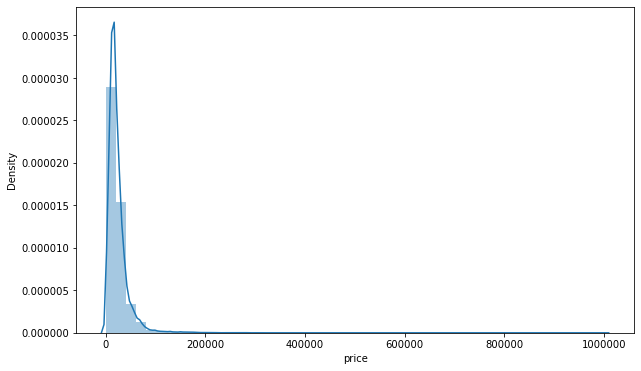

In [36]:
sns.distplot(df.price)

plt.ticklabel_format(style='plain');

In [37]:
def show_distribution(col):
    print("Statistical calculations:")
    print("----------------------------------")
    
    min_val = col.min()
    print(min_val)
    
    mean_val = round(col.mean(), 2)
    print(mean_val)

    med_val = col.median()
    print(med_val)
    
    mod_val = col.mode()[0]
    print(mod_val)
    
    max_val = col.max()
    print(max_val)
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('frequency', fontsize=10)
    
    ax[0].axvline(x=min_val,  color='orange',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')

Statistical calculations:
----------------------------------
490.0
23470.66
17979.0
14990.0
999999.0


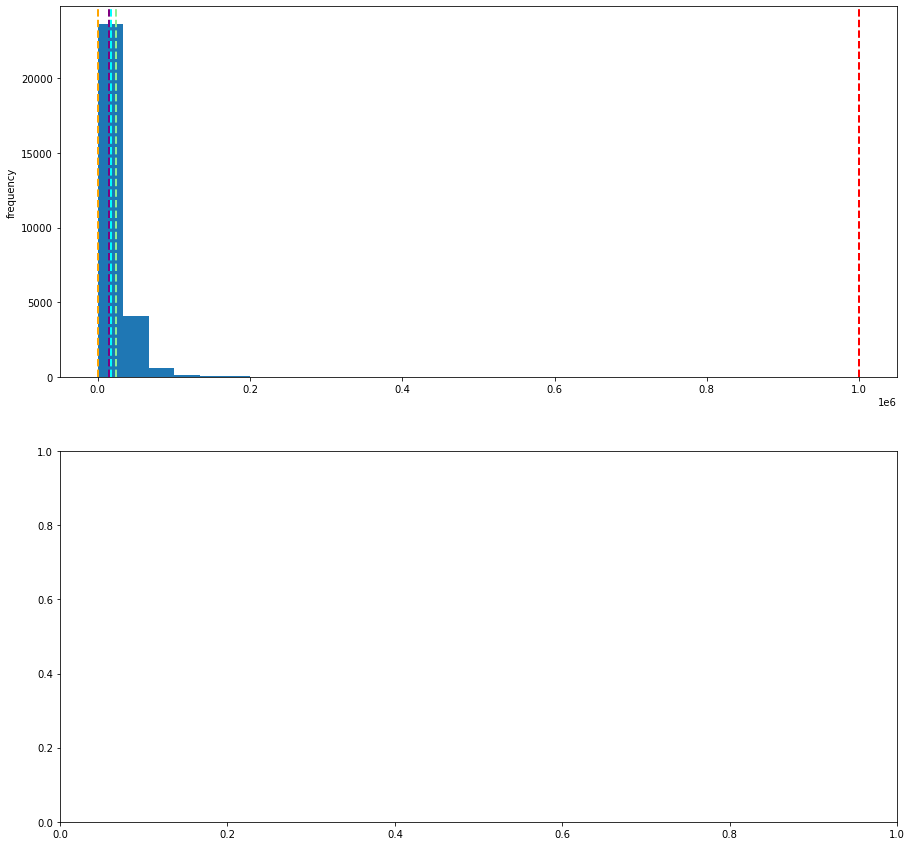

In [38]:
show_distribution(df['price'])

# make_model

In [39]:
first_looking("make_model")

column name: make_model
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 611
---------------------------------
Renault Megane     863
SEAT Leon          787
Volvo V40          740
Dacia Sandero      730
Hyundai i30        706
                  ... 
Toyota GR86          1
Toyota Tacoma        1
Toyota Tundra        1
Toyota 4-Runner      1
Volvo 244            1
Name: make_model, Length: 611, dtype: int64


In [40]:
first_looking('make')

column name: make
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 13
---------------------------------
\nVolvo\n            3659
\nMercedes-Benz\n    2398
\nOpel\n             2385
\nPeugeot\n          2360
\nRenault\n          2351
\nFiat\n             2338
\nFord\n             2324
\nNissan\n           2064
\nToyota\n           2038
\nHyundai\n          1867
\nSEAT\n             1743
\nSkoda\n            1566
\nDacia\n            1537
Name: make, dtype: int64


In [41]:
df.make = df.make.str.strip('\n')
df.make.value_counts(dropna=False)

Volvo            3659
Mercedes-Benz    2398
Opel             2385
Peugeot          2360
Renault          2351
Fiat             2338
Ford             2324
Nissan           2064
Toyota           2038
Hyundai          1867
SEAT             1743
Skoda            1566
Dacia            1537
Name: make, dtype: int64

In [42]:
df.make

0        Mercedes-Benz
1        Mercedes-Benz
2        Mercedes-Benz
3        Mercedes-Benz
4        Mercedes-Benz
             ...      
29474            Volvo
29475            Volvo
29476            Volvo
29477            Volvo
29478            Volvo
Name: make, Length: 28630, dtype: object

In [43]:
df.model = df.model.explode().str.strip('\n, ')
df.model

0           A 160
1         EQE 350
2        A 45 AMG
3        A 35 AMG
4        A 45 AMG
           ...   
29474         S90
29475         S40
29476         C30
29477         S90
29478         S80
Name: model, Length: 28630, dtype: object

In [44]:
df.model.value_counts(dropna=False)

Megane        863
Leon          787
V40           740
Sandero       730
i30           706
             ... 
GLA 35 AMG      1
G 55 AMG        1
Ariya           1
105             1
244             1
Name: model, Length: 594, dtype: int64

In [45]:
df[['make_model', 'make', 'model']].sample(20)

,make_model,make,model
11182,Fiat Tipo,Fiat,Tipo
28014,Volvo XC60,Volvo,XC60
21090,Nissan Leaf,Nissan,Leaf
3484,Opel Astra,Opel,Astra
17578,Toyota Supra,Toyota,Supra
27360,Volvo C70,Volvo,C70
20289,Nissan Qashqai,Nissan,Qashqai
26385,Volvo V40,Volvo,V40
1385,Mercedes-Benz GLA 250,Mercedes-Benz,GLA 250
9670,Fiat Panda,Fiat,Panda


In [46]:
df.make_model.nunique(), df.make.nunique(), df.model.nunique()

(611, 13, 594)

In [47]:
df.groupby('make')[['model']].nunique()

,model
make,
Dacia,9
Fiat,45
Ford,44
Hyundai,35
Mercedes-Benz,205
Nissan,46
Opel,40
Peugeot,39
Renault,45


In [48]:
df.drop(["model"], axis=1, inplace=True)

In [49]:
df.shape

(28630, 45)

# short_description

In [50]:
first_looking("short_description")

column name: short_description
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 20947
---------------------------------
                                                      213
D2 Momentum 120                                        88
D2 Kinetic 120                                         87
Cabrio 1.4T S&S Excellence                             85
Extreme+ 7-Sitzer TCe 110                              57
                                                     ... 
PureTech  EAT8 Allure Pack...DISP. PER NOLEGGIO         1
BlueHDi 130 S&S EAT8 Business                           1
2.0 BlueHDi 180ch S\u0026S GT Line EAT8                 1
1.2 PureTech Première AUT. NAVI PANO                    1
2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUISE! L      1
Name: short_description, Length: 20947, dtype: int64


In [51]:
df.drop("short_description", axis=1, inplace=True)

In [52]:
df.shape

(28630, 44)

# desc

In [53]:
first_looking("desc")

column name: desc
---------------------------------
per_of_nulls % 2.04
num_of_nulls 583
num_of_uniques 23242
---------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [54]:
df.drop("desc", axis=1, inplace=True)

In [55]:
df.shape

(28630, 43)

# location

In [56]:
first_looking("location")

column name: location
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 8181
---------------------------------
Av. Laboral, 10,  28021 MADRID, ES                          306
Luckenwalder Berg 5,  14913 Jüterbog, DE                    170
Ctra. del Mig, 96,,  08097 L'Hospitalet de Llobregat, ES    146
9 boulevard Jules Ferry,  75011 Paris, FR                   142
Neuenhofstr. 77,  52078 Aachen, DE                          135
                                                           ... 
2727CT ZOETERMEER, NL                                         1
Rosendaalsestraat 437-439,  6824 CK ARNHEM, NL                1
5751VH DEURNE, NL                                             1
00148 roma, IT                                                1
Sur rendez-vous,  5060 Sambreville, BE                        1
Name: location, Length: 8181, dtype: int64


In [57]:
df.shape

(28630, 43)

# body_type

In [58]:
first_looking("body_type")

column name: body_type
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 6
---------------------------------
[\n, Station wagon, \n]       5448
[\n, Off-Road/Pick-up, \n]    5415
[\n, Compact, \n]             5387
[\n, Sedan, \n]               5043
[\n, Coupe, \n]               4009
[\n, Convertible, \n]         3328
Name: body_type, dtype: int64


In [59]:
df.body_type.explode().str.strip('\n, ')

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29474      Sedan
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
Name: body_type, Length: 28630, dtype: object

In [60]:
df.body_type = df.body_type.explode().str.strip('\n, ')
df.body_type

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
29474      Sedan
29475      Sedan
29476      Sedan
29477      Sedan
29478      Sedan
Name: body_type, Length: 28630, dtype: object

In [61]:
df["body_type"].value_counts(dropna=False)

Station wagon       5448
Off-Road/Pick-up    5415
Compact             5387
Sedan               5043
Coupe               4009
Convertible         3328
Name: body_type, dtype: int64

# type

In [62]:
first_looking("type")

column name: type
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 4
---------------------------------
[\n, Used, \n]              25251
[\n, Demonstration, \n]      1433
[\n, Pre-registered, \n]     1377
[\n, Employee's car, \n]      569
Name: type, dtype: int64


In [63]:
df['type'] = df['type'].explode().str.strip("\n, ")
df['type'].value_counts(dropna=False)

Used              25251
Demonstration      1433
Pre-registered     1377
Employee's car      569
Name: type, dtype: int64

# doors

In [64]:
first_looking("doors")

column name: doors
---------------------------------
per_of_nulls % 1.25
num_of_nulls 359
num_of_uniques 7
---------------------------------
[\n, 5, \n]    17481
[\n, 2, \n]     5523
[\n, 4, \n]     3001
[\n, 3, \n]     2259
NaN              359
[\n, 6, \n]        5
[\n, 1, \n]        2
Name: doors, dtype: int64


In [65]:
df.doors.explode().str.strip("\n, ")

0        5
1        4
2        5
3        5
4        5
        ..
29474    4
29475    4
29476    3
29477    4
29478    4
Name: doors, Length: 28630, dtype: object

In [66]:
df.doors = df.doors.explode().str.strip("\n, ")

In [67]:
pd.to_numeric(df.doors)

0       5.00
1       4.00
2       5.00
3       5.00
4       5.00
        ... 
29474   4.00
29475   4.00
29476   3.00
29477   4.00
29478   4.00
Name: doors, Length: 28630, dtype: float64

In [68]:
df.doors.value_counts(dropna=False)

5      17481
2       5523
4       3001
3       2259
NaN      359
6          5
1          2
Name: doors, dtype: int64

# country_version

In [69]:
first_looking("country_version")

column name: country_version
---------------------------------
per_of_nulls % 41.01
num_of_nulls 11741
num_of_uniques 26
---------------------------------
NaN                         11741
[\n, Germany, \n]            7939
[\n, Spain, \n]              6376
[\n, Italy, \n]               679
[\n, Belgium, \n]             641
[\n, European Union, \n]      340
[\n, Netherlands, \n]         306
[\n, Austria, \n]             266
[\n, France, \n]              101
[\n, United States, \n]        57
[\n, Czechia, \n]              47
[\n, Poland, \n]               31
[\n, Hungary, \n]              21
[\n, Denmark, \n]              21
[\n, Romania, \n]              12
[\n, Japan, \n]                12
[\n, Switzerland, \n]           9
[\n, Luxembourg, \n]            9
[\n, Sweden, \n]                6
[\n, Slovenia, \n]              5
[\n, Slovakia, \n]              4
[\n, Croatia, \n]               3
[\n, Bulgaria, \n]              1
[\n, Malta, \n]                 1
[\n, Canada, \n]             

In [70]:
df.country_version = df.country_version.explode().str.strip("\n, ")

In [71]:
df.country_version.value_counts(dropna=False)

NaN               11741
Germany            7939
Spain              6376
Italy               679
Belgium             641
European Union      340
Netherlands         306
Austria             266
France              101
United States        57
Czechia              47
Poland               31
Hungary              21
Denmark              21
Romania              12
Japan                12
Switzerland           9
Luxembourg            9
Sweden                6
Slovenia              5
Slovakia              4
Croatia               3
Bulgaria              1
Malta                 1
Canada                1
Mexico                1
Name: country_version, dtype: int64

In [72]:
df.shape

(28630, 43)

In [73]:
df.drop("country_version", axis=1, inplace=True)

In [74]:
df.shape

(28630, 42)

# offer_number

In [75]:
first_looking("offer_number")

column name: offer_number
---------------------------------
per_of_nulls % 19.32
num_of_nulls 5530
num_of_uniques 20946
---------------------------------
NaN                                5530
[\n, 1, \n]                          28
[\n, L-Vorlauf 2023, \n]             10
[\n, 30, \n]                          9
[\n, 20, \n]                          9
                                   ... 
[\n, ggp-EP-880-ZS, \n]               1
[\n, 7475319, \n]                     1
[\n, abci-EZ-260-PS_130291, \n]       1
[\n, 7407611, \n]                     1
[\n, 43-JR-LR, \n]                    1
Name: offer_number, Length: 20946, dtype: int64


In [76]:
df.drop("offer_number", axis=1, inplace=True)

In [77]:
df.shape

(28630, 41)

# warranty

In [78]:
first_looking("warranty")

column name: warranty
---------------------------------
per_of_nulls % 44.87
num_of_nulls 12846
num_of_uniques 66
---------------------------------
NaN                     12846
[\n, 12 months, \n]      9545
[\n, Yes, \n]            2319
[\n, 24 months, \n]      1515
[\n, 60 months, \n]       968
                        ...  
[\n, 55 months, \n]         1
[\n, 99 months, \n]         1
[\n, 122 months, \n]        1
[\n, 44 months, \n]         1
[\n, 4 months, \n]          1
Name: warranty, Length: 66, dtype: int64


In [79]:
df.warranty.str[0].str.extract('(\d{1,4})').astype("float").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 0 to 29478
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13465 non-null  float64
dtypes: float64(1)
memory usage: 447.3 KB


In [80]:
df.warranty = df.warranty.str[0].str.extract('(\d{1,4})').astype("float")

In [81]:
df.warranty.value_counts(dropna=False)

NaN       15165
12.00      9545
24.00      1515
60.00       968
6.00        398
          ...  
55.00         1
99.00         1
122.00        1
44.00         1
4.00          1
Name: warranty, Length: 65, dtype: int64

# mileage

In [82]:
first_looking("mileage")

column name: mileage
---------------------------------
per_of_nulls % 0.0
num_of_nulls 1
num_of_uniques 14184
---------------------------------
10 km         586
1 km          172
50 km         133
100 km        119
5,000 km      118
             ... 
141,589 km      1
59,821 km       1
123,500 km      1
29,781 km       1
230,047 km      1
Name: mileage, Length: 14184, dtype: int64


In [83]:
df.mileage

0        120,200 km
1          5,000 km
2         18,900 km
3         18,995 km
4        197,000 km
            ...    
29474     40,345 km
29475    145,000 km
29476     96,000 km
29477     94,343 km
29478    230,047 km
Name: mileage, Length: 28630, dtype: object

In [84]:
df.mileage = df.mileage.str.replace(",", "").str.extract("(\d{1,6})").astype("float")

In [85]:
df.mileage.value_counts(dropna=False)

10.00        586
1.00         172
50.00        133
100.00       119
5000.00      118
            ... 
43577.00       1
141589.00      1
59821.00       1
123500.00      1
230047.00      1
Name: mileage, Length: 14180, dtype: int64

# first_registration

In [86]:
first_looking("first_registration")

column name: first_registration
---------------------------------
per_of_nulls % 0.01
num_of_nulls 2
num_of_uniques 656
---------------------------------
08/2022    454
06/2022    428
05/2019    420
06/2019    418
07/2019    416
          ... 
06/1967      1
06/1980      1
09/1970      1
06/1963      1
10/1979      1
Name: first_registration, Length: 656, dtype: int64


In [87]:
df.first_registration = df.first_registration.str.extract("(\d{4})", expand=False).astype("float")

In [88]:
df.first_registration.value_counts(dropna=False)

2019.00    3667
2018.00    3492
2022.00    3086
2021.00    2870
2020.00    2473
           ... 
2023.00       1
1929.00       1
1950.00       1
1928.00       1
2202.00       1
Name: first_registration, Length: 84, dtype: int64

# production_date

In [89]:
first_looking("production_date")

column name: production_date
---------------------------------
per_of_nulls % 79.36
num_of_nulls 22722
num_of_uniques 50
---------------------------------
NaN        22722
2019.00     1179
2021.00      980
2022.00      894
2020.00      763
2018.00      762
2017.00      391
2016.00      239
2015.00      118
2014.00       90
2013.00       76
2010.00       53
2012.00       43
2011.00       43
2008.00       34
2009.00       26
2007.00       20
2006.00       17
2002.00       15
2004.00       13
2003.00       13
1967.00       12
2001.00       12
1966.00       11
1999.00        9
2005.00        9
1965.00        9
1970.00        9
1997.00        8
1994.00        8
1968.00        7
2000.00        7
1998.00        5
1990.00        3
1973.00        3
1987.00        3
1993.00        3
1991.00        3
1996.00        3
1995.00        2
1969.00        2
1978.00        2
1982.00        2
1961.00        1
1954.00        1
1988.00        1
1962.00        1
1981.00        1
1985.00        1
1976.00     

In [90]:
df[df.first_registration.notnull() & df.production_date.notnull() & (df.first_registration != df.production_date)]\
[["first_registration", "production_date"]]

,first_registration,production_date
23,2019.00,2018.00
30,2020.00,2018.00
31,2020.00,2019.00
470,2022.00,2021.00
472,2019.00,2016.00
...,...,...
29350,2019.00,2017.00
29380,2022.00,2021.00
29414,2022.00,2021.00
29426,2020.00,2019.00


# Feature Engineering for "Age" Column

In [91]:
df["age"] = 2022 - df.first_registration
df.age.value_counts(dropna=False)

3.00       3667
4.00       3492
0.00       3086
1.00       2870
2.00       2473
           ... 
-1.00         1
93.00         1
72.00         1
94.00         1
-180.00       1
Name: age, Length: 84, dtype: int64

In [92]:
df.drop(["first_registration", "production_date"], axis=1, inplace=True)

In [93]:
df.shape

(28630, 40)

# gearbox

In [94]:
first_looking("gearbox")

column name: gearbox
---------------------------------
per_of_nulls % 0.87
num_of_nulls 248
num_of_uniques 4
---------------------------------
[\nManual\n]            17023
[\nAutomatic\n]         11287
NaN                       248
[\nSemi-automatic\n]       72
Name: gearbox, dtype: int64


In [95]:
df.gearbox = df.gearbox.explode().str.strip("\n")

In [96]:
df.gearbox.value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: gearbox, dtype: int64

# power

In [97]:
first_looking("power")

column name: power
---------------------------------
per_of_nulls % 2.0
num_of_nulls 572
num_of_uniques 352
---------------------------------
[\n110 kW (150 hp)\n]      1992
[\n96 kW (131 hp)\n]       1356
[\n88 kW (120 hp)\n]       1182
[\n81 kW (110 hp)\n]       1166
[\n66 kW (90 hp)\n]        1110
                           ... 
[\n746 kW (1,014 hp)\n]       1
[\n570 kW (775 hp)\n]         1
[\n471 kW (640 hp)\n]         1
[\n179 kW (243 hp)\n]         1
[\n26 kW (35 hp)\n]           1
Name: power, Length: 352, dtype: int64


In [98]:
df.power

0                          NaN
1        [\n215 kW (292 hp)\n]
2        [\n310 kW (421 hp)\n]
3        [\n225 kW (306 hp)\n]
4        [\n100 kW (136 hp)\n]
                 ...          
29474    [\n288 kW (392 hp)\n]
29475    [\n125 kW (170 hp)\n]
29476     [\n84 kW (114 hp)\n]
29477    [\n187 kW (254 hp)\n]
29478    [\n147 kW (200 hp)\n]
Name: power, Length: 28630, dtype: object

In [99]:
df["power_kW"] = df.power.str[0].str.strip("\n").str.extract("(\d{1,3})+\D").astype("float")
df.power_kW.value_counts(dropna=False)

110.00    1992
96.00     1356
88.00     1182
81.00     1166
66.00     1110
          ... 
746.00       1
570.00       1
471.00       1
179.00       1
26.00        1
Name: power_kW, Length: 352, dtype: int64

In [100]:
df["power_hp"] = df.power.str[0].str.strip("\n").str.extract("\D+(\d{1,3})").astype("float")
df.power_hp.value_counts(dropna=False)

150.00    1992
131.00    1356
120.00    1182
110.00    1166
90.00     1110
          ... 
465.00       1
412.00       1
670.00       1
506.00       1
33.00        1
Name: power_hp, Length: 348, dtype: int64

In [101]:
df.drop("power", axis=1, inplace=True)

In [102]:
df.shape

(28630, 41)

# fuel_type

In [103]:
first_looking("fuel_type")

column name: fuel_type
---------------------------------
per_of_nulls % 6.24
num_of_nulls 1787
num_of_uniques 47
---------------------------------
Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   5

In [104]:
df.fuel_type.str.split("/").value_counts(dropna=False)

[Gasoline]                                                                                                    8532
[Diesel]                                                                                                      5911
[Super 95]                                                                                                    3557
[Diesel (Particle filter)]                                                                                    2816
[Regular, Benzine 91]                                                                                         2065
NaN                                                                                                           1787
[Super E10 95]                                                                                                1016
[Regular, Benzine 91 (Particle filter)]                                                                        555
[Super 95 (Particle filter)]                                                    

In [105]:
df.fuel_type.str.split("/").str[0].value_counts(dropna=False)

Gasoline                                         8532
Diesel                                           5911
Super 95                                         3557
Regular                                          2906
Diesel (Particle filter)                         2816
NaN                                              1787
Super E10 95                                     1016
Super 95 (Particle filter)                        537
Super E10 95 (Particle filter)                    324
Others                                            197
Gasoline (Particle filter)                        196
Electric                                          185
Super Plus 98                                     170
Liquid petroleum gas (LPG)                        148
CNG                                                87
LPG                                                73
Super Plus E10 98                                  42
Super Plus E10 98 (Particle filter)                35
Domestic gas H              

In [106]:
df.fuel_type.str.split("/").str[0].str.strip().value_counts(dropna=False)

Gasoline                                        8532
Diesel                                          5911
Super 95                                        3559
Regular                                         2906
Diesel (Particle filter)                        2816
NaN                                             1787
Super E10 95                                    1016
Super 95 (Particle filter)                       538
Super E10 95 (Particle filter)                   324
Others                                           197
Gasoline (Particle filter)                       196
Electric                                         185
Super Plus 98                                    170
Liquid petroleum gas (LPG)                       160
CNG                                               87
LPG                                               73
Super Plus E10 98                                 42
Super Plus E10 98 (Particle filter)               35
Domestic gas H                                

In [107]:
df["fuel_type"] = df.fuel_type.str.split("/").str[0].str.strip()

In [108]:
df.fuel_type.str.split("(").str[0].str.strip().value_counts(dropna=False)

Gasoline                8728
Diesel                  8727
Super 95                4097
Regular                 2906
NaN                     1787
Super E10 95            1340
Others                   213
Electric                 188
Super Plus 98            185
Liquid petroleum gas     165
CNG                       95
Super Plus E10 98         77
LPG                       77
Domestic gas H            25
Domestic gas L            13
Ethanol                    3
Hydrogen                   3
Biogas                     1
Name: fuel_type, dtype: int64

In [109]:
df["fuel_type"] = df.fuel_type.str.split("(").str[0].str.strip()

In [110]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others", "Ethanol"]
petroleum_gas = ["Liquid petroleum gas", "CNG", "LPG", "Domestic gas H", "Domestic gas L", "Biogas", "Hydrogen"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in petroleum_gas:
        return "Liquid/Natural Gas"
    else:
        return x

In [111]:
df["fuel_type"] = df.fuel_type.apply(fueltype)

In [112]:
df.fuel_type.value_counts(dropna=False)

Benzine               17549
Diesel                 8727
NaN                    1787
Liquid/Natural Gas      379
Electric                188
Name: fuel_type, dtype: int64

# colour

In [113]:
first_looking("colour")

column name: colour
---------------------------------
per_of_nulls % 6.02
num_of_nulls 1724
num_of_uniques 15
---------------------------------
Black     6473
Grey      5998
White     5185
Blue      3478
Red       2242
NaN       1724
Silver    1622
Green      450
Brown      437
Orange     288
Beige      278
Yellow     230
Violet      98
Bronze      65
Gold        62
Name: colour, dtype: int64


# manufacturer_colour

In [114]:
first_looking("manufacturer_colour")

column name: manufacturer_colour
---------------------------------
per_of_nulls % 23.9
num_of_nulls 6843
num_of_uniques 4964
---------------------------------
NaN                               6843
Blanco                            1235
Gris                               671
Azul                               552
Negro                              546
                                  ... 
Colore esterno (snowflake whit       1
Pompeigraumetallic                   1
Cararragrau                          1
ICE WHITE (wit metallic)             1
Denim Blue metallic (blauw met       1
Name: manufacturer_colour, Length: 4964, dtype: int64


In [115]:
df[["colour", "manufacturer_colour"]].sample(10)

,colour,manufacturer_colour
4693,White,Cream white
10658,Green,NaN
24269,Red,NaN
10695,Blue,NaN
7522,Black,Zwart
28505,Blue,Denim blauw
17251,Blue,Azul
14575,Black,Black Magic (1Z1Z)
18058,Grey,Grau metallic
12288,Black,Zwart metallic


In [116]:
df[df.colour.isnull() & df.manufacturer_colour.notnull()][["colour", "manufacturer_colour"]]

,colour,manufacturer_colour
1,NaN,Negro Obsidiana
24,NaN,GRIS GRAFITO
37,NaN,Plata Iridio
145,NaN,Gris Montagne
169,NaN,Bleu denim métallisé
...,...,...
29434,NaN,Blanc Cristal
29439,NaN,Gris Osmium
29440,NaN,Noir Onyx Métallisé
29441,NaN,Gris Osmium


In [117]:
df.drop(["colour", "manufacturer_colour"], axis=1, inplace=True)

In [118]:
df.shape

(28630, 39)

# paint

In [119]:
df.paint.value_counts(dropna=False)

Metallic     14494
NaN          14135
Uni/basic        1
Name: paint, dtype: int64

In [120]:
df.paint = df.paint.replace(np.nan, "Uni/basic", regex=True)

In [121]:
df.paint.value_counts(dropna=False)

Metallic     14494
Uni/basic    14136
Name: paint, dtype: int64

In [122]:
df.drop(["paint"], axis=1, inplace=True)

In [123]:
df.shape

(28630, 38)

# seller

In [124]:
first_looking("seller")

column name: seller
---------------------------------
per_of_nulls % 0.0
num_of_nulls 0
num_of_uniques 2
---------------------------------
Dealer            26318
Private seller     2312
Name: seller, dtype: int64


# seats

In [125]:
first_looking("seats")

column name: seats
---------------------------------
per_of_nulls % 10.92
num_of_nulls 3125
num_of_uniques 12
---------------------------------
[\n, 5, \n]     18308
[\n, 4, \n]      5390
NaN              3125
[\n, 2, \n]      1186
[\n, 7, \n]       488
[\n, 8, \n]        43
[\n, 9, \n]        35
[\n, 3, \n]        25
[\n, 6, \n]        12
[\n, 0, \n]         9
[\n, 1, \n]         7
[\n, 17, \n]        2
Name: seats, dtype: int64


In [126]:
df.seats.apply(lambda x : x[0] if type(x)==list else x)

0              NaN
1        \n, 5, \n
2        \n, 5, \n
3        \n, 5, \n
4        \n, 5, \n
           ...    
29474    \n, 4, \n
29475    \n, 5, \n
29476    \n, 4, \n
29477    \n, 5, \n
29478    \n, 5, \n
Name: seats, Length: 28630, dtype: object

In [127]:
df.seats = df.seats.apply(lambda x : x[0] if type(x)==list else x)

In [128]:
df.seats.str.extract("(\d{1,4})").astype("float")

,0
0,NaN
1,5.00
2,5.00
3,5.00
4,5.00
...,...
29474,4.00
29475,5.00
29476,4.00
29477,5.00


In [129]:
df.seats = df.seats.str.extract("(\d{1,4})").astype("float")

In [130]:
df.seats.value_counts(dropna=False)

5.00     18308
4.00      5390
NaN       3125
2.00      1186
7.00       488
8.00        43
9.00        35
3.00        25
6.00        12
0.00         9
1.00         7
17.00        2
Name: seats, dtype: int64

# engine_size

In [131]:
first_looking("engine_size")

column name: engine_size
---------------------------------
per_of_nulls % 4.9
num_of_nulls 1403
num_of_uniques 468
---------------------------------
[\n1,598 cc\n]    2099
[\n999 cc\n]      2068
[\n1,969 cc\n]    1929
NaN               1403
[\n1,461 cc\n]    1110
                  ... 
[\n2,753 cc\n]       1
[\n2,495 cc\n]       1
[\n200 cc\n]         1
[\n3,224 cc\n]       1
[\n2,473 cc\n]       1
Name: engine_size, Length: 468, dtype: int64


In [132]:
df['engine_size'] = df['engine_size'].astype(str).str.strip("['\\n, cc\\n']").replace({"a", np.nan})
df['engine_size'] = df['engine_size'].str.replace(',', '').str.extract('(\d+)').astype("float")
df['engine_size']

0           NaN
1          1.00
2       1991.00
3       1991.00
4       2143.00
          ...  
29474   1969.00
29475   2435.00
29476   1560.00
29477   1969.00
29478   2922.00
Name: engine_size, Length: 28630, dtype: float64

In [133]:
df.engine_size.value_counts(dropna=False)

1598.00    2099
999.00     2068
1969.00    1929
NaN        1403
1461.00    1110
           ... 
2753.00       1
2495.00       1
200.00        1
3224.00       1
2473.00       1
Name: engine_size, Length: 468, dtype: int64

# gears

In [134]:
first_looking("gears")

column name: gears
---------------------------------
per_of_nulls % 33.8
num_of_nulls 9676
num_of_uniques 12
---------------------------------
NaN         9676
[\n6\n]     8412
[\n5\n]     5335
[\n7\n]     1738
[\n8\n]     1690
[\n1\n]      712
[\n9\n]      642
[\n4\n]      256
[\n10\n]     112
[\n0\n]       31
[\n3\n]       24
[\n2\n]        2
Name: gears, dtype: int64


In [135]:
df.gears.astype("str").str.extract("(\d+)").astype("float")

,0
0,NaN
1,9.00
2,8.00
3,7.00
4,7.00
...,...
29474,8.00
29475,5.00
29476,6.00
29477,8.00


In [136]:
df.gears = df.gears.astype("str").str.extract("(\d+)").astype("float")

In [137]:
df.gears.value_counts(dropna=False)

NaN      9676
6.00     8412
5.00     5335
7.00     1738
8.00     1690
1.00      712
9.00      642
4.00      256
10.00     112
0.00       31
3.00       24
2.00        2
Name: gears, dtype: int64

# co_emissions

In [138]:
first_looking("co_emissions")

column name: co_emissions
---------------------------------
per_of_nulls % 35.05
num_of_nulls 10036
num_of_uniques 348
---------------------------------
NaN                  10036
0 g/km (comb.)        1038
119 g/km (comb.)       393
124 g/km (comb.)       340
129 g/km (comb.)       319
                     ...  
7 g/km (comb.)           1
80 g/km (comb.)          1
196  g/km (comb.)        1
100  g/km (comb.)        1
53 g/km (comb.)          1
Name: co_emissions, Length: 348, dtype: int64


In [139]:
df["co_emissions"] = df["co_emissions"].astype(str).str.extract('(\d+)').astype("float")
df["co_emissions"]

0          NaN
1         0.00
2          NaN
3          NaN
4          NaN
         ...  
29474      NaN
29475   217.00
29476    99.00
29477   149.00
29478   251.00
Name: co_emissions, Length: 28630, dtype: float64

In [140]:
df["co_emissions"].value_counts(dropna=False)

NaN       10036
0.00       1040
119.00      393
124.00      340
129.00      319
          ...  
332.00        1
70.00         1
338.00        1
342.00        1
53.00         1
Name: co_emissions, Length: 327, dtype: int64

# drivetrain

In [141]:
first_looking("drivetrain")

column name: drivetrain
---------------------------------
per_of_nulls % 41.0
num_of_nulls 11737
num_of_uniques 4
---------------------------------
[\n, Front, \n]    12066
NaN                11737
[\n, 4WD, \n]       3252
[\n, Rear, \n]      1575
Name: drivetrain, dtype: int64


In [142]:
df["drivetrain"] = df["drivetrain"].explode().str.strip("\n, ")
df["drivetrain"]

0          NaN
1          NaN
2          4WD
3          4WD
4          4WD
         ...  
29474      4WD
29475    Front
29476    Front
29477      NaN
29478    Front
Name: drivetrain, Length: 28630, dtype: object

In [143]:
df["drivetrain"].value_counts(dropna=False)

Front    12066
NaN      11737
4WD       3252
Rear      1575
Name: drivetrain, dtype: int64

# cylinders

In [144]:
first_looking("cylinders")

column name: cylinders
---------------------------------
per_of_nulls % 34.15
num_of_nulls 9778
num_of_uniques 13
---------------------------------
[\n4\n]     13068
NaN          9778
[\n3\n]      3258
[\n6\n]      1013
[\n5\n]       799
[\n8\n]       539
[\n2\n]       103
[\n0\n]        35
[\n1\n]        21
[\n12\n]        8
[\n7\n]         6
[\n26\n]        1
[\n16\n]        1
Name: cylinders, dtype: int64


In [145]:
df["cylinders"] = df["cylinders"].astype(str).str.extract('(\d+)').astype("float")
df["cylinders"]

0        NaN
1        NaN
2       4.00
3       4.00
4       4.00
        ... 
29474   4.00
29475   5.00
29476   4.00
29477   4.00
29478   6.00
Name: cylinders, Length: 28630, dtype: float64

In [146]:
df["cylinders"].value_counts(dropna=False)

4.00     13068
NaN       9778
3.00      3258
6.00      1013
5.00       799
8.00       539
2.00       103
0.00        35
1.00        21
12.00        8
7.00         6
26.00        1
16.00        1
Name: cylinders, dtype: int64

# fuel_consumption

In [147]:
first_looking("fuel_consumption")

column name: fuel_consumption
---------------------------------
per_of_nulls % 18.32
num_of_nulls 5245
num_of_uniques 3453
---------------------------------
NaN                                                                            5245
[[0 l/100 km (comb.)]]                                                          330
[[0 l/100 km (comb.)], [0 l/100 km (city)], [0 l/100 km (country)]]             306
[[3.4 l/100 km (comb.)], [3.7 l/100 km (city)], [3.2 l/100 km (country)]]       170
[[4 l/100 km (comb.)]]                                                          149
                                                                               ... 
[[14.2 l/100 km (comb.)], [21.3 l/100 km (city)], [10 l/100 km (country)]]        1
[[3.5 l/100 km (comb.)], [4.4 l/100 km (city)], [2.9 l/100 km (country)]]         1
[[4.5 l/100 km (comb.)], [6.2 l/100 km (city)], [3.5 l/100 km (country)]]         1
[[4.9 l/100 km (comb.)], [99.9 l/100 km (city)], [98 l/100 km (country)]]         1
[[1

In [148]:
df["fuel_consumption"].iloc[2]

[['8.4 l/100 km (comb.)'],
 ['10.9 l/100 km (city)'],
 ['5.8 l/100 km (country)']]

In [149]:
df["fuel_consumption"][2][0]

['8.4 l/100 km (comb.)']

In [150]:
def cons_avg(x):
    
    if type(x)==list:
        if x[0] != []: return x[0][0]
        else: return None
  
    else:
        return None

In [151]:
df['cons_avg'] = df["fuel_consumption"].apply(cons_avg).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_avg']                                        # str.extract('(\S+)')

0         NaN
1         NaN
2        8.40
3        7.30
4        4.90
         ... 
29474    2.00
29475    9.10
29476    3.80
29477    6.50
29478   10.40
Name: cons_avg, Length: 28630, dtype: float64

In [152]:
df["fuel_consumption"][2][1]

['10.9 l/100 km (city)']

In [153]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    else:
        return None

In [154]:
df['cons_city'] =  df["fuel_consumption"].apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_city']                                          # str.extract('(\S+)')

0         NaN
1         NaN
2       10.90
3        9.30
4        5.70
         ... 
29474     NaN
29475   13.20
29476    4.30
29477    8.60
29478   15.30
Name: cons_city, Length: 28630, dtype: float64

In [155]:
df["fuel_consumption"][2][2]

['5.8 l/100 km (country)']

In [156]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    else:
        return None

In [157]:
df['cons_country'] = df["fuel_consumption"].apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") 
df['cons_country']                                            # str.extract('(\S+)')

0        NaN
1        NaN
2       5.80
3       6.10
4       4.40
        ... 
29474    NaN
29475   6.70
29476   3.50
29477   5.30
29478   7.60
Name: cons_country, Length: 28630, dtype: float64

In [158]:
df.shape

(28630, 41)

In [159]:
df.drop("fuel_consumption", axis=1, inplace=True)

In [160]:
df.shape

(28630, 40)

# empty_weight

In [161]:
first_looking("empty_weight")

column name: empty_weight
---------------------------------
per_of_nulls % 37.97
num_of_nulls 10872
num_of_uniques 1219
---------------------------------
NaN               10872
[\n1,395 kg\n]      233
[\n1,055 kg\n]      224
[\n1,423 kg\n]      216
[\n1,165 kg\n]      200
                  ...  
[\n1,877 kg\n]        1
[\n1,011 kg\n]        1
[\n1,069 kg\n]        1
[\n983 kg\n]          1
[\n1,391 kg\n]        1
Name: empty_weight, Length: 1219, dtype: int64


In [162]:
df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,1545.00
...,...
29474,2077.00
29475,1357.00
29476,1356.00
29477,1617.00


In [163]:
df['empty_weight'] = df['empty_weight'].astype(str).str.replace(',', '').str.extract('(\d+)').astype("float")
df['empty_weight'].value_counts(dropna=False)

NaN        10872
1395.00      233
1055.00      224
1423.00      216
1165.00      200
           ...  
1877.00        1
1011.00        1
1069.00        1
983.00         1
1391.00        1
Name: empty_weight, Length: 1219, dtype: int64

# model_code

In [164]:
first_looking("model_code")

column name: model_code
---------------------------------
per_of_nulls % 70.78
num_of_nulls 20263
num_of_uniques 2187
---------------------------------
NaN                   20263
[\n, 8212/AFJ, \n]       75
[\n, 1727/AAM, \n]       64
[\n, 1349/AGI, \n]       61
[\n, 1889/ABU, \n]       55
                      ...  
[\n, 7593/ANL, \n]        1
[\n, 1727/ABC, \n]        1
[\n, 4136/AEC, \n]        1
[\n, 4136/668, \n]        1
[\n, 9101/449, \n]        1
Name: model_code, Length: 2187, dtype: int64


In [165]:
df.drop("model_code", axis=1, inplace=True)

In [166]:
df.shape

(28630, 39)

# general_inspection

In [167]:
first_looking("general_inspection")

column name: general_inspection
---------------------------------
per_of_nulls % 57.2
num_of_nulls 16376
num_of_uniques 92
---------------------------------
NaN        16376
New         5883
05/2023      286
08/2023      280
03/2023      268
           ...  
09/2017        1
08/2013        1
08/2020        1
08/2018        1
03/2021        1
Name: general_inspection, Length: 92, dtype: int64


In [168]:
df.drop("general_inspection", axis=1, inplace=True)

In [169]:
df.shape

(28630, 38)

# full_service_history

In [170]:
first_looking("full_service_history")

column name: full_service_history
---------------------------------
per_of_nulls % 56.11
num_of_nulls 16065
num_of_uniques 2
---------------------------------
NaN    16065
Yes    12565
Name: full_service_history, dtype: int64


In [171]:
df["full_service_history"].replace(np.nan, "No", inplace=True)

In [172]:
df["full_service_history"].value_counts(dropna=False)

No     16065
Yes    12565
Name: full_service_history, dtype: int64

# non_smoker_vehicle

In [173]:
first_looking("non_smoker_vehicle")

column name: non_smoker_vehicle
---------------------------------
per_of_nulls % 59.5
num_of_nulls 17036
num_of_uniques 2
---------------------------------
NaN    17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64


In [174]:
df["non_smoker_vehicle"].replace(np.nan, "No", inplace=True)

In [175]:
df["non_smoker_vehicle"].value_counts(dropna=False)

No     17036
Yes    11594
Name: non_smoker_vehicle, dtype: int64

In [176]:
df.drop("non_smoker_vehicle", axis=1, inplace=True)

In [177]:
df.shape

(28630, 37)

# emission_class

In [178]:
first_looking("emission_class")

column name: emission_class
---------------------------------
per_of_nulls % 37.62
num_of_nulls 10771
num_of_uniques 10
---------------------------------
NaN             10771
Euro 6           6418
Euro 6d-TEMP     3399
Euro 6d          2858
Euro 5           2389
Euro 4           1743
Euro 3            523
Euro 2            217
Euro 1            172
Euro 6c           140
Name: emission_class, dtype: int64


In [179]:
Euro_6 = ["Euro 6", "Euro 6d-TEMP", "Euro 6d", "Euro 6c"]

def emissionclass(x):
    if x in Euro_6:
        return "Euro 6"
    else:
        return x

df["emission_class"] = df["emission_class"].apply(emissionclass)

In [180]:
df["emission_class"].value_counts(dropna=False)

Euro 6    12815
NaN       10771
Euro 5     2389
Euro 4     1743
Euro 3      523
Euro 2      217
Euro 1      172
Name: emission_class, dtype: int64

In [181]:
df.drop("emission_class", axis=1, inplace=True)

In [182]:
df.shape

(28630, 36)

# emissions_sticker

In [183]:
first_looking("emissions_sticker")

column name: emissions_sticker
---------------------------------
per_of_nulls % 67.12
num_of_nulls 19216
num_of_uniques 5
---------------------------------
NaN               19216
4 (Green)          9230
1 (No sticker)      176
3 (Yellow)            6
2 (Red)               2
Name: emissions_sticker, dtype: int64


In [184]:
df["emissions_sticker"] = df["emissions_sticker"].astype(str).str.extract(r"([a-zA-Z]+)")

In [185]:
df["emissions_sticker"].value_counts(dropna=False)

nan       19216
Green      9230
No          176
Yellow        6
Red           2
Name: emissions_sticker, dtype: int64

In [186]:
df.drop("emissions_sticker", axis=1, inplace=True)

In [187]:
df.shape

(28630, 35)

# upholstery_colour

In [188]:
first_looking("upholstery_colour")

column name: upholstery_colour
---------------------------------
per_of_nulls % 49.11
num_of_nulls 14061
num_of_uniques 12
---------------------------------
NaN       14061
Black     10416
Grey       2038
Other      1003
Beige       466
Brown       275
Red         159
White        93
Blue         82
Orange       23
Green         8
Yellow        6
Name: upholstery_colour, dtype: int64


In [189]:
Ordinary = ["Black", "White"]
Primary = ["Red", "Yellow", "Blue"]
Secondary = ["Green", "Orange"]
Tertiary_Intermediate = ["Brown", "Grey", "Beige"]

def coloridentifier(x):
    if x in Ordinary:
        return "Ordinary"
    if x in Primary:
        return "Primary"
    if x in Secondary:
        return "Secondary"
    if x in Tertiary_Intermediate:
        return "Tertiary"    
    else:
        return x

df["upholstery_colour"] = df["upholstery_colour"].apply(coloridentifier)

In [190]:
df["upholstery_colour"].value_counts(dropna=False)

NaN          14061
Ordinary     10509
Tertiary      2779
Other         1003
Primary        247
Secondary       31
Name: upholstery_colour, dtype: int64

In [191]:
df.drop("upholstery_colour", axis=1, inplace=True)

In [192]:
df.shape

(28630, 34)

# previous_owner

In [193]:
first_looking("previous_owner")

column name: previous_owner
---------------------------------
per_of_nulls % 51.05
num_of_nulls 14615
num_of_uniques 11734
---------------------------------
NaN                           14615
[[50 km, 06/2022], 1]            64
[[10 km, 08/2022], 1]            59
[[10 km, 07/2022], 1]            45
[[10 km, 09/2022], 1]            38
                              ...  
[[358,000 km, 10/2010], 2]        1
[[165,400 km, 09/2010], 1]        1
[[65,000 km, 10/2006], 1]         1
[[71,000 km, 04/2013], 1]         1
[[230,047 km, 07/2002], 5]        1
Name: previous_owner, Length: 11734, dtype: int64


In [194]:
df["previous_owner"] = df["previous_owner"].str[1]
df["previous_owner"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29474    NaN
29475    NaN
29476      1
29477    NaN
29478      5
Name: previous_owner, Length: 28630, dtype: object

In [195]:
df["previous_owner"].value_counts(dropna=False)

NaN    14615
1       9746
2       3221
3        699
4        184
5         69
6         37
7         22
8         16
9         14
12         3
10         2
14         1
13         1
Name: previous_owner, dtype: int64

# energy_efficiency_class

In [196]:
first_looking("energy_efficiency_class")

column name: energy_efficiency_class
---------------------------------
per_of_nulls % 72.74
num_of_nulls 20826
num_of_uniques 11
---------------------------------
NaN     20826
B        2090
A        1687
C        1133
A+       1089
D         636
A+++      375
G         309
E         271
F         147
A++        67
Name: energy_efficiency_class, dtype: int64


In [197]:
efficient = ["A", "A+", "A++", "A+++", "B"]
unefficient = ["C", "D", "E", "F", "G"]

def energyefficiency(x):
    if x in efficient:
        return "efficient"
    elif x in unefficient:
        return "unefficient"    
    else:
        return x

df["energy_efficiency_class"] = df["energy_efficiency_class"].apply(energyefficiency)

In [198]:
df["energy_efficiency_class"].value_counts(dropna=False)

NaN            20826
efficient       5308
unefficient     2496
Name: energy_efficiency_class, dtype: int64

# co_efficiency

In [199]:
first_looking("co_efficiency")

column name: co_efficiency
---------------------------------
per_of_nulls % 72.74
num_of_nulls 20826
num_of_uniques 2
---------------------------------
NaN                                                                                           20826
Calculated on basis of measured CO₂-emissions taking into account the mass of the vehicle.     7804
Name: co_efficiency, dtype: int64


In [200]:
df.drop("co_efficiency", axis=1, inplace=True)

In [201]:
df.shape

(28630, 33)

# comfort_&_convenience

In [202]:
first_looking("comfort_&_convenience")

column name: comfort_&_convenience
---------------------------------
per_of_nulls % 11.17
num_of_nulls 3197
num_of_uniques 14439
---------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                              3197
[Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows]                                                                                                                                                                                                                                                                                              244
[Air conditioning, Automa

In [203]:
df["comfort_&_convenience"]

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        [Air conditioning, Automatic climate control, ...
4        [Air conditioning, Electrical side mirrors, Mu...
                               ...                        
29474    [Air conditioning, Automatic climate control, ...
29475    [Air conditioning, Armrest, Automatic climate ...
29476    [Air conditioning, Armrest, Automatic climate ...
29477    [Air conditioning, Armrest, Automatic climate ...
29478    [Air conditioning, Armrest, Cruise control, El...
Name: comfort_&_convenience, Length: 28630, dtype: object

In [204]:
df["comfort_&_convenience"] = [", ".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]

In [205]:
df["comfort_&_convenience"].value_counts(dropna=False).head()

NaN                                                                                                                                   3197
Air conditioning, Automatic climate control, Electrical side mirrors, Multi-function steering wheel, Power windows                     244
Air conditioning, Automatic climate control, Cruise control                                                                            171
Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Multi-function steering wheel, Power windows     168
Air conditioning                                                                                                                       157
Name: comfort_&_convenience, dtype: int64

# entertainment_&_media

In [206]:
first_looking("entertainment_&_media")

column name: entertainment_&_media
---------------------------------
per_of_nulls % 17.42
num_of_nulls 4986
num_of_uniques 1945
---------------------------------
NaN                                                                                                                                                                          4986
[Bluetooth, USB]                                                                                                                                                              753
[Bluetooth]                                                                                                                                                                   665
[On-board computer]                                                                                                                                                           662
[CD player, On-board computer, Radio]                                                                                         

In [207]:
df["entertainment_&_media"] = [", ".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]

In [208]:
df["entertainment_&_media"].value_counts(dropna=False).head(10)

NaN                                                                                                                4986
Bluetooth, USB                                                                                                      753
Bluetooth                                                                                                           665
On-board computer                                                                                                   662
CD player, On-board computer, Radio                                                                                 644
Radio                                                                                                               425
Android Auto, Apple CarPlay, Bluetooth, Digital radio, Hands-free equipment, On-board computer, Radio, USB          414
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                                      408
CD player, Radio                        

# extras

In [209]:
first_looking("extras")

column name: extras
---------------------------------
per_of_nulls % 17.99
num_of_nulls 5150
num_of_uniques 9361
---------------------------------
NaN                                                                                                                                                                                                                                                                   5150
[Alloy wheels]                                                                                                                                                                                                                                                        3408
[Alloy wheels, Roof rack]                                                                                                                                                                                                                                              380
[Alloy wheels, Sport seats]                         

In [210]:
df[["extras"]]

,extras
0,NaN
1,NaN
2,NaN
3,[Sport seats]
4,NaN
...,...
29474,[Alloy wheels]
29475,"[Alloy wheels (16""), Trailer hitch]"
29476,"[Alloy wheels, Automatically dimming interior ..."
29477,"[Alloy wheels (18""), Automatically dimming int..."


In [211]:
df["extras"] = [", ".join(item) if type(item) == list else item for item in df["extras"]]

In [212]:
df["extras"].value_counts(dropna=False).head(10)

NaN                                                               5150
Alloy wheels                                                      3408
Alloy wheels, Roof rack                                            380
Alloy wheels, Sport seats                                          372
Alloy wheels, Touch screen                                         231
Alloy wheels, Catalytic Converter, Touch screen                    178
Roof rack                                                          160
Alloy wheels, Sport seats, Sport suspension                        157
Alloy wheels, Catalytic Converter, Touch screen, Voice Control     153
Alloy wheels, Touch screen, Voice Control                          142
Name: extras, dtype: int64

# safety_&_security

In [213]:
first_looking("safety_&_security")

column name: safety_&_security
---------------------------------
per_of_nulls % 11.23
num_of_nulls 3215
num_of_uniques 12550
---------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            3215
[Isofix]                                                                                                                                                                                                                                                                                                                             

In [214]:
df["safety_&_security"] = [", ".join(item) if type(item) == list else item for item in df["safety_&_security"]]

In [215]:
df["safety_&_security"].value_counts(dropna=False).head()

NaN                                                                                                                                                  3215
Isofix                                                                                                                                                380
ABS, Central door lock, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag     328
ABS, Central door lock, Driver-side airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Traction control                 125
ABS, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Isofix, Power steering, Side airbag                             121
Name: safety_&_security, dtype: int64

# Now we can save our cleaned file as in csv format.

In [216]:
display(df.shape)
print(df.index[0], df.index[-1])

df = df.reset_index(drop=True)

display(df.shape)
print(df.index[0], df.index[-1])

(28630, 33)

0 29478


(28630, 33)

0 28629


# We started with 58 columns at the beginning of the analysis, now we have 33 columns.

In [217]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.00,80900.00,69900.00,46990.00,16800.00
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5,4,5,5,5
warranty,24.00,24.00,12.00,12.00,12.00
mileage,120200.00,5000.00,18900.00,18995.00,197000.00
gearbox,Manual,Automatic,Automatic,Automatic,Automatic


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   make                     28630 non-null  object 
 2   location                 28630 non-null  object 
 3   price                    28630 non-null  float64
 4   body_type                28630 non-null  object 
 5   type                     28630 non-null  object 
 6   doors                    28271 non-null  object 
 7   warranty                 13465 non-null  float64
 8   mileage                  28629 non-null  float64
 9   gearbox                  28382 non-null  object 
 10  fuel_type                26843 non-null  object 
 11  seller                   28630 non-null  object 
 12  seats                    25505 non-null  float64
 13  engine_size              27227 non-null  float64
 14  gears                 

In [219]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column doors has mixed object types.
Column gearbox has mixed object types.
Column fuel_type has mixed object types.
Column drivetrain has mixed object types.
Column comfort_&_convenience has mixed object types.
Column entertainment_&_media has mixed object types.
Column safety_&_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column previous_owner has mixed object types.
Column energy_efficiency_class has mixed object types.


# Let us save our dataset with a csv extension for further analysis (Handling Missing Values) in the following notebook:

In [220]:
df.to_csv("clean_scout2022.csv", index=False)

In [221]:
df.head()

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,power_hp,cons_avg,cons_city,cons_country
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.00,Compact,Used,5,24.00,120200.00,Manual,...,No,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.00,Compact,Pre-registered,4,24.00,5000.00,Automatic,...,No,NaN,NaN,NaN,0.00,215.00,292.00,NaN,NaN,NaN
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.00,Compact,Used,5,12.00,18900.00,Automatic,...,No,NaN,NaN,NaN,2.00,310.00,421.00,8.40,10.90,5.80
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.00,Compact,Used,5,12.00,18995.00,Automatic,...,No,NaN,NaN,NaN,2.00,225.00,306.00,7.30,9.30,6.10
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.00,Compact,Used,5,12.00,197000.00,Automatic,...,No,NaN,NaN,NaN,7.00,100.00,136.00,4.90,5.70,4.40
